In [ ]:
import pandas as pd
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import glob
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import pandas as pd

In [ ]:
xy_list = ['Age', 'Sex', 'Systolic BP', 'Cholesterol', 'Fasting Blood Sugar', 'Max Heart Rate']
x_list = ['Age', 'Systolic BP', 'Fasting Blood Sugar', 'Max Heart Rate', 'Sex']
y_list = ['Cholesterol']

In [ ]:
full_df = pd.read_csv("Merged_data.csv")

In [ ]:
full_df.head()

,Sex,Age,Cholesterol,Systolic BP,Max Heart Rate,Fasting Blood Sugar,Result,Data Set
0,Male,39,195.0,106.0,180.7,0,0,Framingham
1,Female,46,250.0,121.0,175.8,0,0,Framingham
2,Male,48,245.0,127.5,174.4,0,0,Framingham
3,Female,61,225.0,150.0,165.3,0,1,Framingham
4,Female,46,285.0,130.0,175.8,0,0,Framingham


In [ ]:
full_df['Cholesterol'] = full_df['Cholesterol'].fillna(0)
to_predict = full_df[full_df['Cholesterol'] == 0]
to_train = full_df[full_df['Cholesterol'] != 0]

to_train["Sex"] = to_train["Sex"].apply(lambda x: 1 if x == "Male" else 0)
to_predict["Sex"] = to_predict["Sex"].apply(lambda x: 1 if x == "Male" else 0)

<ipython-input-6-5068ef24427e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_train["Sex"] = to_train["Sex"].apply(lambda x: 1 if x == "Male" else 0)
<ipython-input-6-5068ef24427e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict["Sex"] = to_predict["Sex"].apply(lambda x: 1 if x == "Male" else 0)


In [ ]:
to_train.to_csv("to_train.csv")
to_predict.to_csv("to_predict.csv")

In [ ]:
X = pd.DataFrame(to_train[x_list]).apply(pd.to_numeric, errors='coerce').dropna().to_numpy()
Y = pd.DataFrame(to_train[y_list]).apply(pd.to_numeric, errors='coerce').dropna().to_numpy()

In [ ]:
to_train[x_list]

,Age,Systolic BP,Fasting Blood Sugar,Max Heart Rate,Sex
0,39,106.0,0,180.7,1
1,46,121.0,0,175.8,0
2,48,127.5,0,174.4,1
3,61,150.0,0,165.3,0
4,46,130.0,0,175.8,0
...,...,...,...,...,...
7775,45,110.0,0,132.0,1
7776,68,144.0,1,141.0,1
7777,57,130.0,0,115.0,1
7778,57,130.0,0,174.0,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9)

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=True)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

pipeline.fit(X_train, Y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
Y_pred = pipeline.predict(X_test)

In [ ]:
cv_scores = np.mean(cross_val_score(pipeline, X, Y, cv=5, scoring='r2'))
cv_scores

-0.11470600225347309

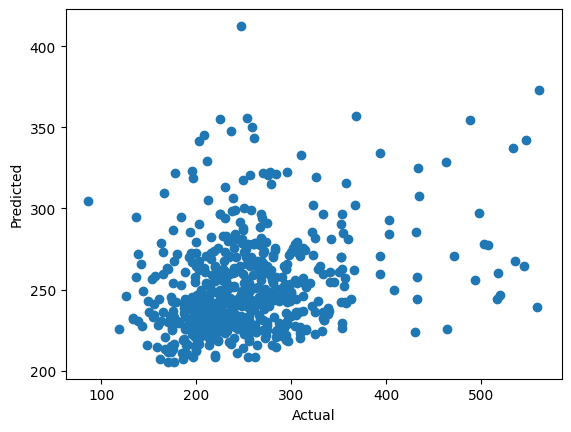

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

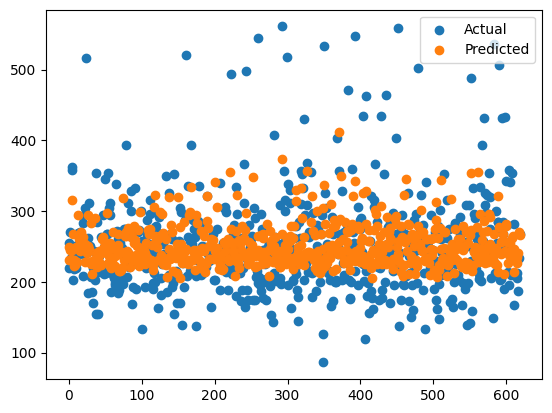

In [ ]:
plt.scatter(range(len(Y_test)), Y_test, label='Actual')
plt.scatter(range(len(Y_pred)), Y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
X_predict = pd.DataFrame(to_predict[x_list]).apply(pd.to_numeric, errors='coerce').dropna().to_numpy()
y_predict = pipeline.predict(X_predict)
y_predict

array([[260.8097284 ],
       [239.94559415],
       [228.64283179],
       ...,
       [300.98452239],
       [228.2899031 ],
       [280.39449278]])

In [ ]:
to_predict['Cholesterol'] = y_predict

<ipython-input-17-e8341849fa90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict['Cholesterol'] = y_predict


In [ ]:
full_df = pd.concat([to_train, to_predict])
full_df.to_csv("synthetic_data.csv")

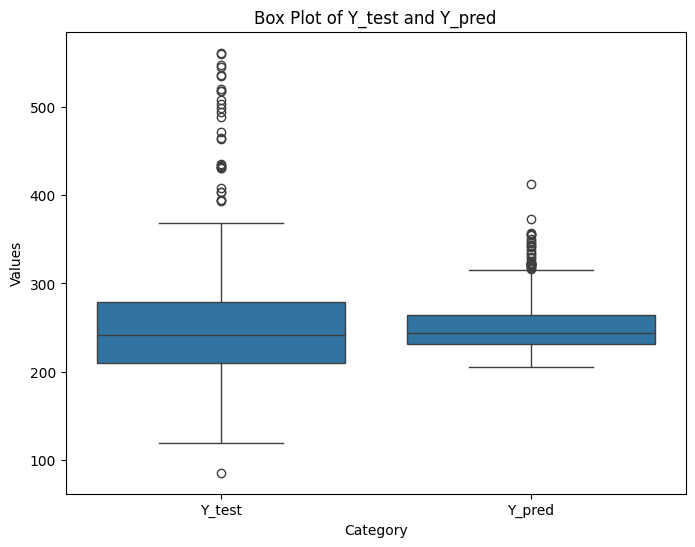

In [ ]:
# Ensuring that Y_test and Y_pred are flattened to 1-dimensional arrays before creating the DataFrame

# Flattening the arrays in case they have unexpected shapes
Y_test_flat = np.ravel(Y_test)
Y_pred_flat = np.ravel(Y_pred)

# Re-creating the DataFrame with corrected shapes
data = pd.DataFrame({
    "Values": np.concatenate([Y_test_flat, Y_pred_flat]),
    "Category": ["Y_test"] * len(Y_test_flat) + ["Y_pred"] * len(Y_pred_flat)
})

# Plotting the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Category", y="Values", data=data)
plt.title("Box Plot of Y_test and Y_pred")
plt.xlabel("Category")
plt.ylabel("Values")
plt.show()


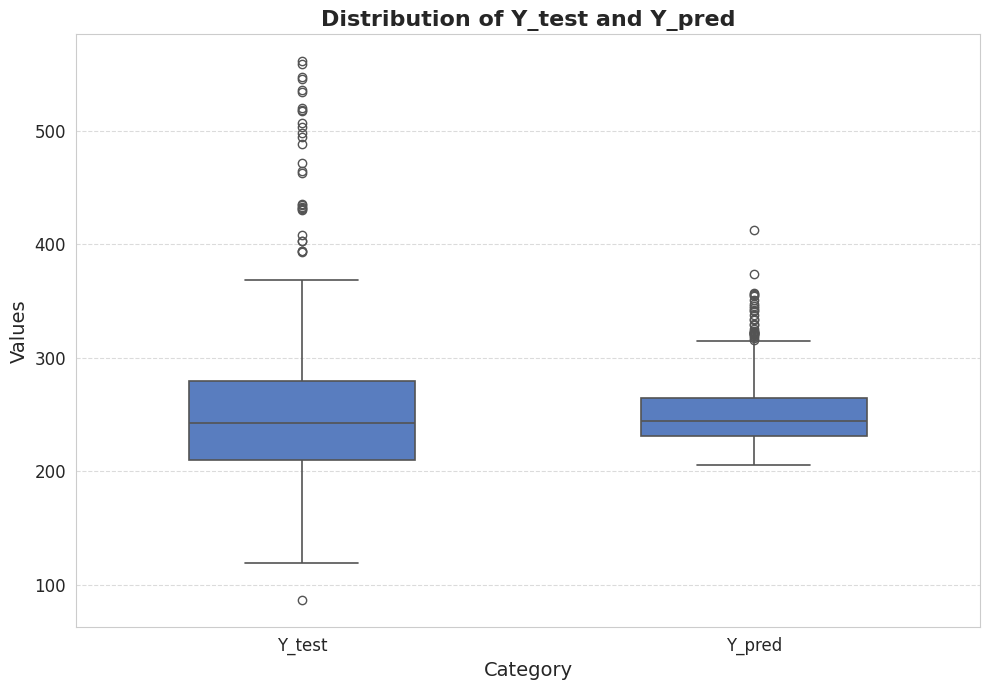

In [ ]:
# Enhancing the plot
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")  # Setting a white grid background
sns.set_palette("muted")    # Using a muted color palette

# Creating the box plot
sns.boxplot(x="Category", y="Values", data=data, width=0.5, linewidth=1.2)

plt.title("Distribution of Y_test and Y_pred", fontsize=16, fontweight='bold')
plt.xlabel("Category", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding dashed grid lines on the y-axis for readability

# Showing the plot
plt.tight_layout()  # Adjusts layout to fit all elements well
plt.show()